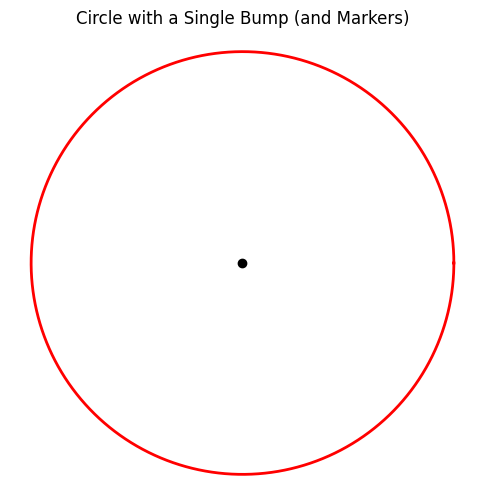

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def circle_with_bump(num_points=400, 
                     base_radius=1.0, 
                     bump_angle=np.pi/4, 
                     bump_height=0.2, 
                     bump_width=0.3):
    """
    Returns x, y arrays representing a circle of radius `base_radius`
    with a Gaussian 'bump' at angle `bump_angle`.

    Parameters:
    -----------
    num_points : int
        Number of points used to sample the curve.
    base_radius : float
        The base radius of the circle (without the bump).
    bump_angle : float
        The angle (in radians) where the bump is centered.
    bump_height : float
        The maximum height of the bump above the base radius.
    bump_width : float
        Controls how wide the bump is in angle space.

    Returns:
    --------
    x, y : np.ndarray
        Arrays of x and y coordinates for plotting.
    """
    # Angles from 0 to 2π
    theta = np.linspace(0, 2*np.pi, num_points)

    # Define the radial distance using a Gaussian "bump"
    # r(θ) = base_radius + bump_height * exp( -((θ - bump_angle)^2)/(2*bump_width^2) )
    r = base_radius + bump_height * np.exp(-((theta - bump_angle)**2) / (2*bump_width**2))

    # Convert to Cartesian coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return x, y

if __name__ == "__main__":
    # Parameters
    base_radius = 1.0
    bump_angle = 2*np.pi / 3  # 45 degrees (adjust as desired)
    bump_height = 0
    bump_width = 0.3

    # Generate the circle-with-bump
    x, y = circle_with_bump(
        num_points=400,
        base_radius=base_radius,
        bump_angle=bump_angle,
        bump_height=bump_height,
        bump_width=bump_width
    )

    # Plot the shape
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, 'r', linewidth=2, label='Circle with Bump')

    # 1) Mark the center with a black dot
    plt.plot(0, 0, 'ko', label='Center')

    # 2) Draw a dotted line from the center to the bump peak
    # The peak occurs exactly at `bump_angle`, 
    # where r = base_radius + bump_height (because the Gaussian exponent is zero).
    peak_radius = base_radius + bump_height
    peak_x = peak_radius * np.cos(bump_angle)
    peak_y = peak_radius * np.sin(bump_angle)

    #plt.plot([0, peak_x], [0, peak_y], 'k--', label='Peak Direction')

    # Make axes equal and turn them off for a cleaner look
    plt.axis('equal')
    plt.axis('off')

    plt.title("Circle with a Single Bump (and Markers)")
    #plt.legend()
    plt.show()
